# **Modelo**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn import metrics

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


def MetricasMatrizConfusion(y,Modelo,X,tipo="ML"):
    ## Validar la longitud de los datos
    if (len(y)==len(X)):
        
        if (tipo!="ML"):
            Probabilidad=Modelo.predict(exog=X) # Logit
            Predicciones=np.where(Probabilidad<0.5,0,1)
        else:
            Predicciones=Modelo.predict(X) # Modleo de ML    
        td1=pd.DataFrame(Predicciones,columns=["Predicciones"])
        td2=pd.concat([y.reset_index(drop=True),td1],axis=1)
        td2.columns=["Realidad","Predicciones"]
        Matriz=pd.crosstab(td2["Realidad"],td2["Predicciones"],margins=True)
        
        ## Formato porcentaje
        MatrizNormalizada=pd.crosstab(td2["Realidad"],td2["Predicciones"],normalize=0)
        sns.heatmap(MatrizNormalizada,annot=True,linewidths = 0.01, cmap = "Blues")
        
        ### Métricas, Recall, Precisión
        
        Accuracy =metrics.accuracy_score(y,Predicciones)
        print(f'Accuracy: {Accuracy}')
        Reporte=metrics.classification_report(y,Predicciones)
        print(f'Reporte : {Reporte}')
        
    
    
    else:
        
        Matriz=[]
        print("Los datos no tienen la misma longitud")
    
    
    return Matriz

def curva_roc(y,Modelo,X,tipo="ML"):
    if (tipo!="ML"):
        Probabilidad=Modelo.predict(exog=X) # Logit (statsmodels)
    else:
        Probabilidad=Modelo.predict_proba(X)[:,1] # cuando es Machine Learning(SKlearn) 
        
    roc_auc=roc_auc_score(y,Probabilidad)
    false_positive,true_positive,limites=roc_curve(y,Probabilidad)
    ramdom_probs=[0 for i in range(len(y))]
    c,d,_=roc_curve(y,ramdom_probs,pos_label=1) ## Diagonal
    
    plt.plot(false_positive,true_positive,linestyle="--",color="green",label="AUC: "+str(round(roc_auc,2)))
    plt.plot(c,d,linestyle="--",color="blue")
    plt.xlabel("Tasa Falsos Positivos")
    plt.ylabel("Tasa Verdaderos Positivos")
    plt.legend()
    plt.show()
    return roc_auc

import warnings
warnings.filterwarnings("ignore")

# **Datos**

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Oscar19922017/DeploymentML2023/main/train_ctrUa4K.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.isnull().sum()/len(df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [5]:
##  No hacemos imputaciòn, se eliminan los valores nulos
df=df.dropna().reset_index(drop=True)

**Homologaciòn Variables**

In [6]:
df["Gender"]=df["Gender"].map({"Male":0,"Female":1})
df["Married"]=df["Married"].map({"Yes":1,"No":0})
df["Loan_Status"]=df["Loan_Status"].map({"Y":1,"N":0})

In [7]:
df.isnull().sum()/len(df)*100

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

# **Preparamos los datos paa el Modelo**

In [8]:
X=df[["Gender","Married","ApplicantIncome","LoanAmount","Credit_History"]]

In [9]:
X

,Gender,Married,ApplicantIncome,LoanAmount,Credit_History
0,0,1,4583,128.0,1.0
1,0,1,3000,66.0,1.0
2,0,1,2583,120.0,1.0
3,0,0,6000,141.0,1.0
4,0,1,5417,267.0,1.0
...,...,...,...,...,...
475,1,0,2900,71.0,1.0
476,0,1,4106,40.0,1.0
477,0,1,8072,253.0,1.0
478,0,1,7583,187.0,1.0


In [10]:
y=df[["Loan_Status"]]

In [11]:
y.value_counts()

Loan_Status
1              332
0              148
Name: count, dtype: int64

In [12]:
y.shape

(480, 1)

In [13]:
y.value_counts(normalize=True)

Loan_Status
1              0.691667
0              0.308333
Name: proportion, dtype: float64

## Dividir datos Train y Test

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

In [15]:
y_train.value_counts(normalize=True)

Loan_Status
1              0.692708
0              0.307292
Name: proportion, dtype: float64

In [16]:
y_test.value_counts(normalize=True)

Loan_Status
1              0.6875
0              0.3125
Name: proportion, dtype: float64

In [17]:
X_train.shape

(384, 5)

In [18]:
X_test.shape

(96, 5)

In [19]:
df.shape

(480, 13)

In [20]:
0.2*480

96.0

### **Entrenar Modelo**

In [21]:
model=RandomForestClassifier(random_state=123)

#'n_estimators': 250, 'max_features': 'log2', 'max_depth': 7, 'criterion': 'entropy', 'bootstrap': True

In [22]:
model.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

**Error Train**

Accuracy: 1.0
Reporte :               precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       266

    accuracy                           1.00       384
   macro avg       1.00      1.00      1.00       384
weighted avg       1.00      1.00      1.00       384



Predicciones,0,1,All
Realidad,,,
0,118,0,118
1,0,266,266
All,118,266,384


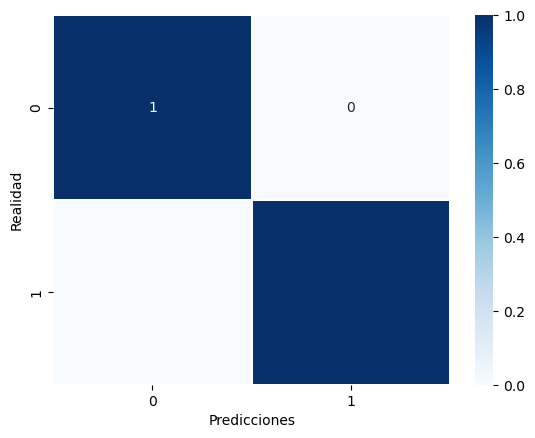

In [23]:
MetricasMatrizConfusion(y=y_train,Modelo=model,X=X_train,tipo="ML")

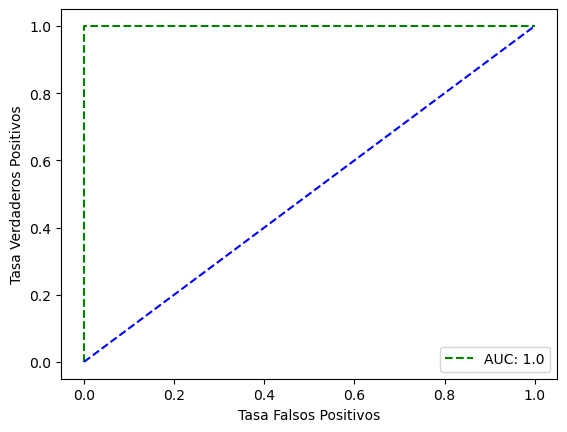

1.0

In [24]:
curva_roc(y=y_train,Modelo=model,X=X_train,tipo="ML")

**Error Test**

Accuracy: 0.71875
Reporte :               precision    recall  f1-score   support

           0       0.57      0.43      0.49        30
           1       0.77      0.85      0.81        66

    accuracy                           0.72        96
   macro avg       0.67      0.64      0.65        96
weighted avg       0.70      0.72      0.71        96



Predicciones,0,1,All
Realidad,,,
0,13,17,30
1,10,56,66
All,23,73,96


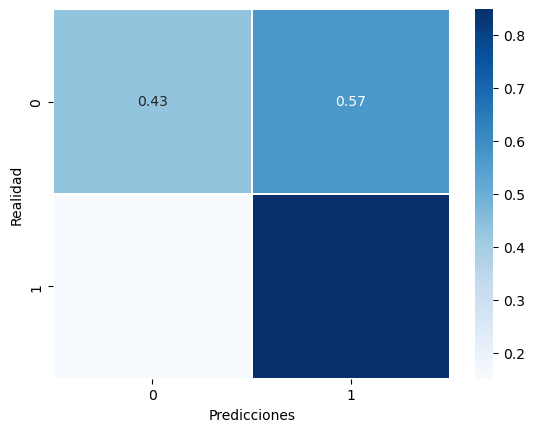

In [25]:
MetricasMatrizConfusion(y=y_test,Modelo=model,X=X_test,tipo="ML")

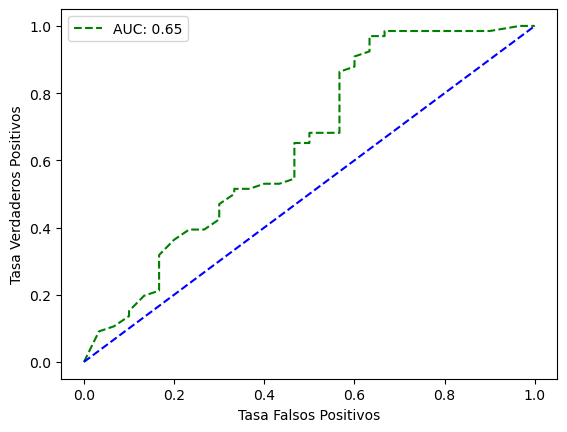

0.6469696969696971

In [26]:
curva_roc(y=y_test,Modelo=model,X=X_test,tipo="ML")

## **Optimizaciòn con CV**

In [27]:
import multiprocessing
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

In [28]:
param_dist = {
    'n_estimators': [100,250 ,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3,5,7],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [29]:
rf_classifier = RandomForestClassifier()

In [30]:
random_search = RandomizedSearchCV(
    rf_classifier, 
    param_distributions=param_dist, 
    n_iter=50,  # Número de combinaciones aleatorias a probar
    cv=5,       # Número de divisiones para la validación cruzada
    scoring='roc_auc',  # Puedes cambiar la métrica de evaluación
    n_jobs=-1   # Utilizar todos los núcleos de la CPU para acelerar el proceso
)

In [31]:
#random_search.fit(X_train, y_train)

In [32]:
#print("Mejores hiperparámetros:", random_search.best_params_)

# **Modelo Final**

In [35]:
ModeloFinal=RandomForestClassifier(random_state=123)

In [36]:
ModeloFinal.fit(X,y)

RandomForestClassifier(random_state=123)

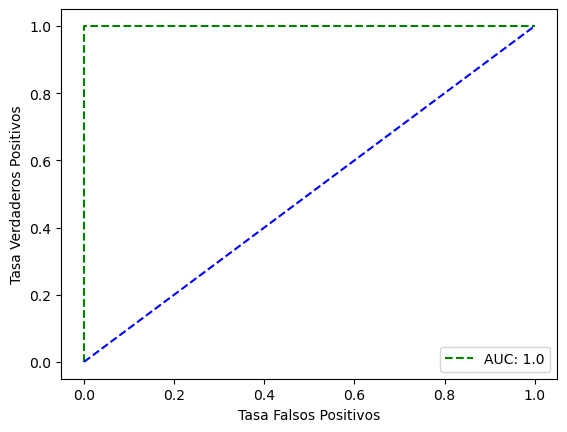

1.0

In [37]:
curva_roc(y=y,Modelo=ModeloFinal,X=X,tipo="ML")

# **Exportar Modelo**

In [38]:
import pickle

In [39]:
with open('clasificador_credito_rf.pkl', 'wb') as file:
    pickle.dump(ModeloFinal, file)